**Credit Card Fraud Project**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

**Exploratory Data Analysis(EDA)**

In [ ]:
#Checking for the first few rows of the data set
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Checking for null values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Awsome! There no missing values in the dataset

In [ ]:
#Checking the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#Describing the dataset to gain more insights on the statistical information of the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.shape

(284807, 31)

In [ ]:
import seaborn as sns

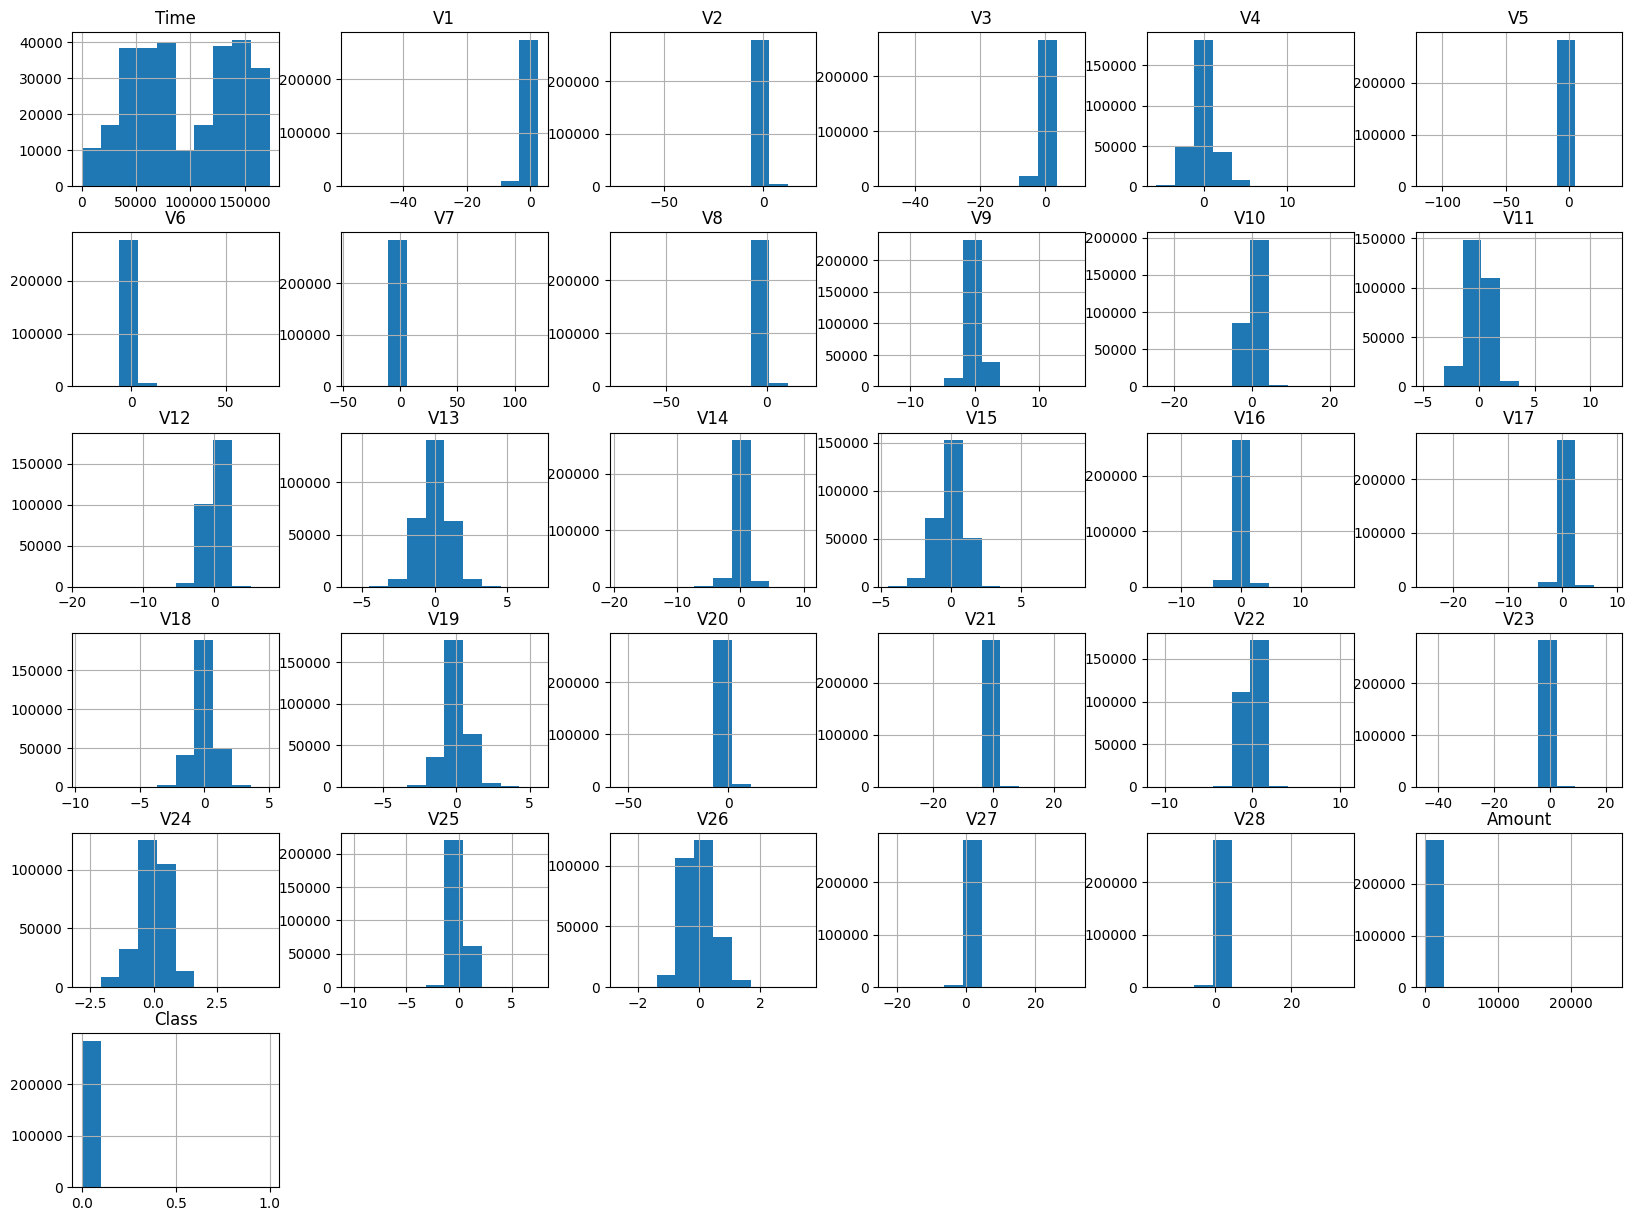

In [ ]:
df.hist(figsize = (20,15));

In [ ]:
#Checking for duplicate values
df.duplicated().sum()

1081

There are 1081 duplicated items in the dataset let's eliminate them

In [ ]:
# remove duplicates
df = df.drop_duplicates()

In [ ]:
#Confirming if the duplicates have been eliminated
df.duplicated().sum()

0

Great! The duplicates have been eliminated successfully

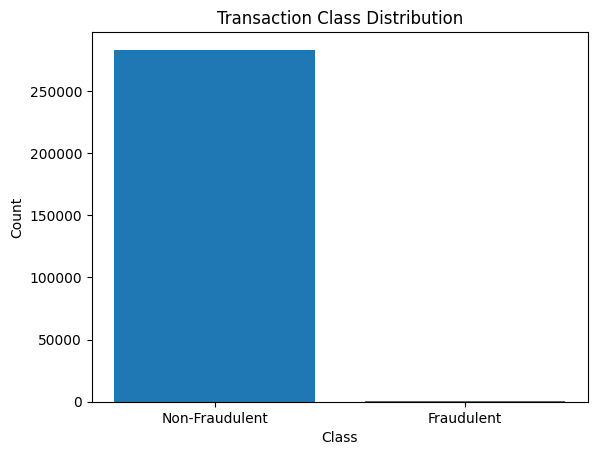

In [ ]:
# Create a bar chart of the 'Class' column
class_counts = df['Class'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.title('Transaction Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(class_counts.index, ['Non-Fraudulent', 'Fraudulent'])
plt.show()


This bar chart shows the number of fraudulent and non-fraudulent transactions in the dataset. We can see if the dataset is balanced or imbalanced, which is important to consider when building a predictive model

<Axes: xlabel='Class', ylabel='count'>

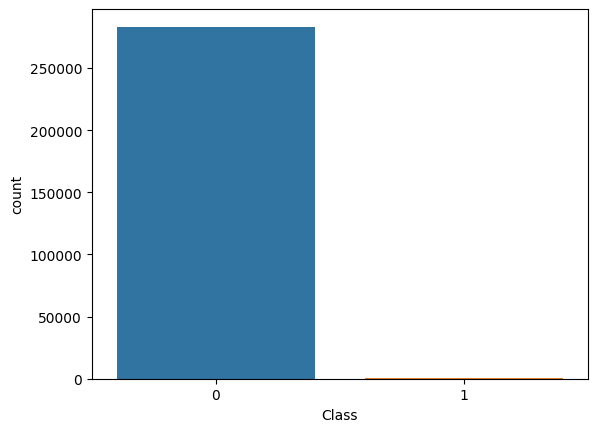

In [ ]:
#Checking the distribution of the target variable to see if there is class imbalance
sns.countplot(x='Class', data=df)


**There is a very huge imbalance Let's balance it**

<Axes: xlabel='Class', ylabel='count'>

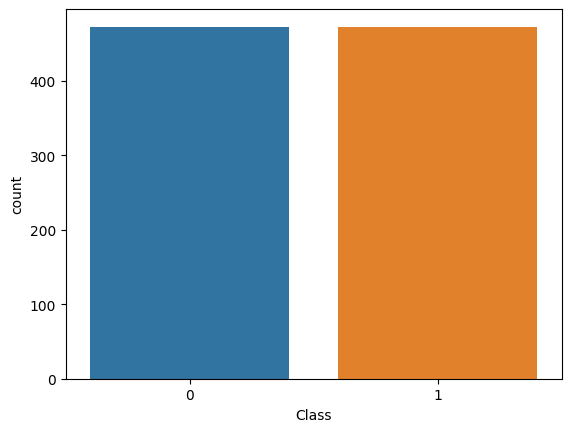

In [ ]:
from sklearn.utils import resample

# Separate the majority and minority classes
majority_class = df[df['Class'] == 0]
minority_class = df[df['Class'] == 1]

# Downsample the majority class randomly to match the number of samples in the minority class
majority_downsampled = resample(majority_class,
                                replace=False,  # sample without replacement
                                n_samples=len(minority_class),  # match minority n
                                random_state=42)  # reproducible results

# Combine the minority class with the downsampled majority class
balanced_df = pd.concat([majority_downsampled, minority_class])

# Shuffle the rows of the balanced dataframe
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the balance of the classes in the new dataframe
sns.countplot(x='Class', data=balanced_df)


**Awsome! The dataset is now balanced successfuly**

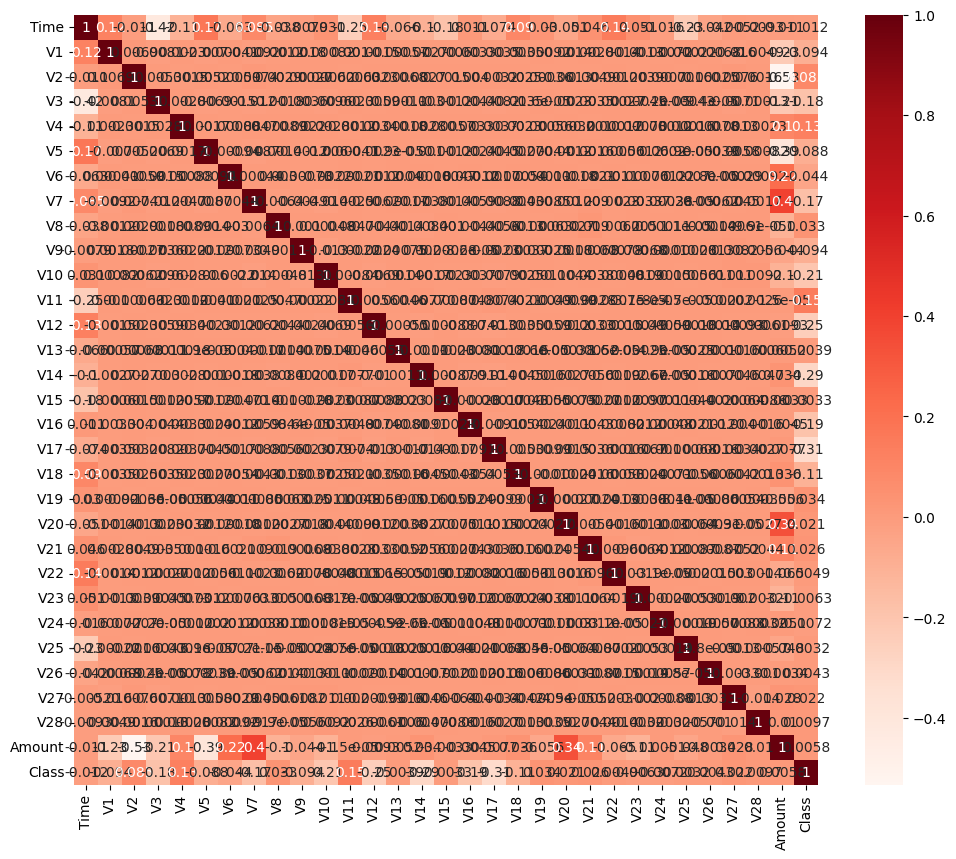

In [ ]:
#Checking the correlation between the variables to identify if any variables are highly correlated with each other
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


Checking the distribution of the numerical variables:

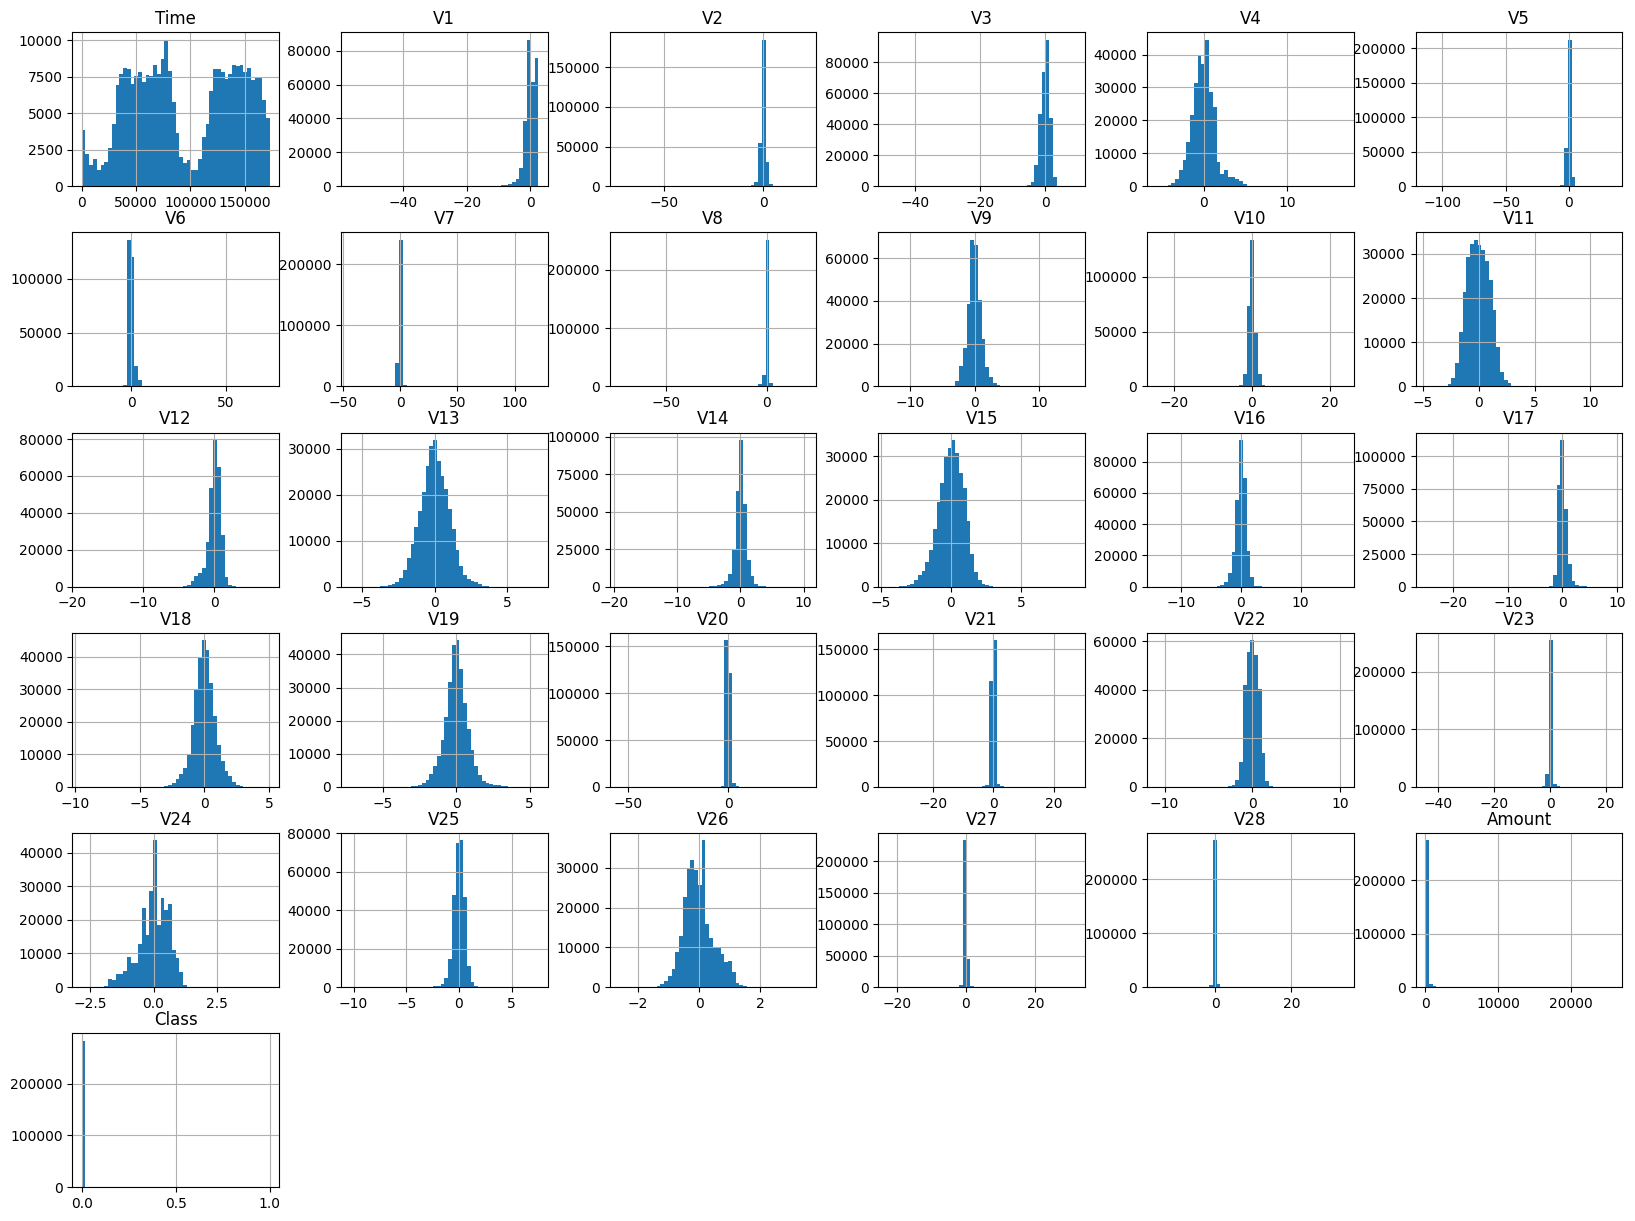

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()


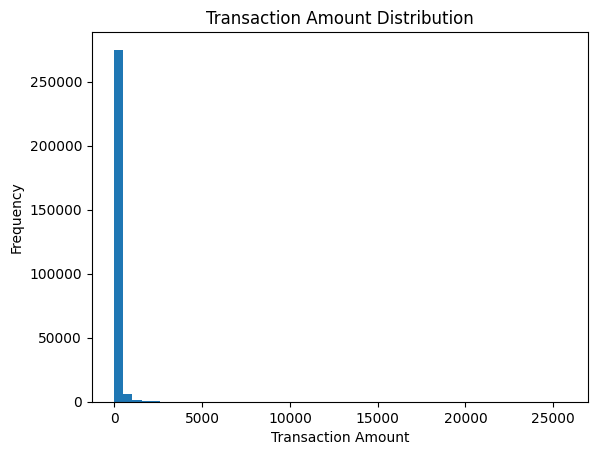

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram of the 'Amount' column
plt.hist(df['Amount'], bins=50)
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()




 The  histogram shows the distribution of transaction amounts in the dataset. So as to  help us identify any unusual patterns or outliers in the data.

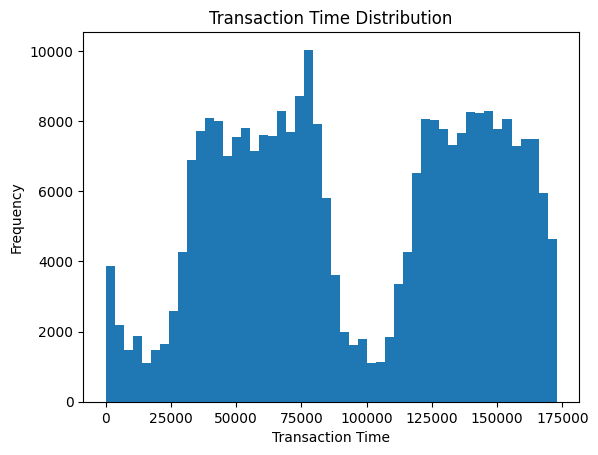

In [ ]:

# Create a histogram of the 'Time' column
plt.hist(df['Time'], bins=50)
plt.title('Transaction Time Distribution')
plt.xlabel('Transaction Time')
plt.ylabel('Frequency')
plt.show()

The histogram above shows the distribution of transaction times. So as to  help us identify any unusual patterns or outliers in the data.

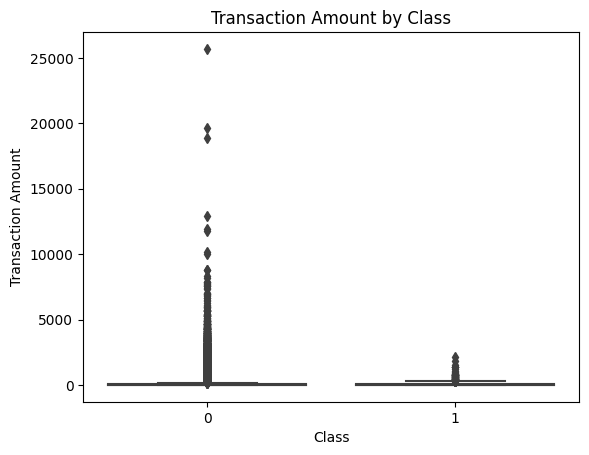

In [ ]:
import seaborn as sns

# Create a box plot of the 'Amount' column, grouped by the 'Class' column
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()


This box plot allows us to compare the distribution of transaction amounts for fraudulent and non-fraudulent transactions. We can see if there are any clear differences in the median or range of transaction amounts between the two classes.

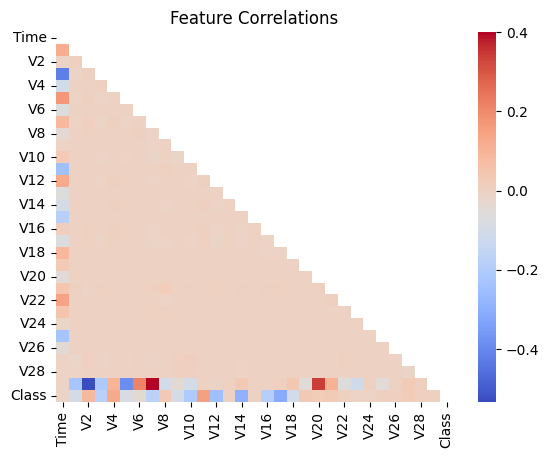

In [ ]:
import numpy as np

# Create a heatmap of the correlations between the different features
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=False)
plt.title('Feature Correlations')
plt.show()


This heatmap shows the correlations between the different features in the dataset. Darker colors indicate stronger correlations, while lighter colors indicate weaker correlations. We can use this visualization to identify any features that are strongly correlated with each other, which may indicate that they are redundant or could be combined in a predictive model.

**FEATURE ENGINEERING AND MACHINE LEARNING**

Before we do much on the machine learning part, let's first see the unique values in the dataset

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df['Time'].unique()
df['V1'].unique()
df['V2'].unique()
df['V3'].unique()
df['V4'].unique()
df['V5'].unique()
df['V6'].unique()
df['V7'].unique()
df['V8'].unique()
df['V9'].unique()
df['V10'].unique()
df['V11'].unique()
df['V12'].unique()
df['V13'].unique()
df['V14'].unique()
df['V15'].unique()
df['V16'].unique()
df['V17'].unique()
df['V18'].unique()
df['V19'].unique()
df['V20'].unique()
df['V21'].unique()
df['V22'].unique()
df['V23'].unique()
df['V24'].unique()
df['V25'].unique()
df['V26'].unique()
df['V27'].unique()
df['V28'].unique()
df['Amount'].unique()
df['Class'].unique()

array([0, 1])

In [ ]:
df['Time'].unique()

array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 1.72787e+05,
       1.72788e+05, 1.72792e+05])

In [ ]:
df['V1'].unique()


array([-1.35980713,  1.19185711, -1.35835406, ...,  1.91956501,
       -0.24044005, -0.53341252])

In [ ]:

df['V2'].unique()



array([-0.07278117,  0.26615071, -1.34016307, ..., -0.30125385,
        0.53048251, -0.18973334])

In [ ]:

df['Class'].unique()

array([0, 1])

In [ ]:

df['Amount'].unique()


array([149.62,   2.69, 378.66, ..., 381.05, 337.54,  95.63])

In [ ]:

df['V3'].unique()


array([ 2.53634674,  0.16648011,  1.77320934, ..., -3.24963981,
        0.70251023,  0.70333737])

In [ ]:
df['V4'].unique()


array([ 1.37815522,  0.44815408,  0.37977959, ..., -0.55782812,
        0.68979917, -0.50627124])

In [ ]:
df['V5'].unique()


array([-0.33832077,  0.06001765, -0.50319813, ...,  2.63051512,
       -0.37796113, -0.01254568])

In [ ]:
df['V6'].unique()


array([ 0.46238778, -0.08236081,  1.80049938, ...,  3.0312601 ,
        0.62370772, -0.64961669])

In [ ]:
df['V7'].unique()


array([ 0.23959855, -0.07880298,  0.79146096, ..., -0.29682653,
       -0.68617999,  1.57700625])

In [ ]:
df['V8'].unique()


array([ 0.0986979 ,  0.08510165,  0.24767579, ...,  0.70841718,
        0.67914546, -0.41465041])

In [ ]:
df['V9'].unique()


array([ 0.36378697, -0.25542513, -1.51465432, ...,  0.43245405,
        0.39208671,  0.48617951])

In [ ]:
df['V10'].unique()


array([ 0.09079417, -0.16697441,  0.20764287, ..., -0.48478176,
       -0.39912565, -0.91542665])

In [ ]:
df['V11'].unique()


array([-0.55159953,  1.61272666,  0.62450146, ...,  0.41161374,
       -1.93384882, -1.04045834])

In [ ]:
df['V12'].unique()


array([-0.61780086,  1.06523531,  0.06608369, ...,  0.06311886,
       -0.96288614, -0.03151305])

In [ ]:
df['V13'].unique()


array([-0.99138985,  0.48909502,  0.71729273, ..., -0.18369869,
       -1.04208166, -0.1880929 ])

In [ ]:
df['V14'].unique()


array([-0.31116935, -0.1437723 , -0.16594592, ..., -0.51060184,
        0.44962444, -0.08431647])

In [ ]:
df['V15'].unique()


array([1.46817697, 0.63555809, 2.34586495, ..., 1.32928351, 1.96256312,
       0.04133346])

In [ ]:
df['V16'].unique()


array([-0.47040053,  0.46391704, -2.89008319, ...,  0.14071598,
       -0.60857713, -0.30262009])

In [ ]:
df['V17'].unique()


array([ 0.20797124, -0.11480466,  1.10996938, ...,  0.31350179,
        0.50992846, -0.66037665])

In [ ]:
df['V18'].unique()


array([ 0.02579058, -0.18336127, -0.12135931, ...,  0.39565248,
        1.11398059,  0.16742993])

In [ ]:
df['V19'].unique()


array([ 0.40399296, -0.14578304, -2.2618571 , ..., -0.57725184,
        2.89784877, -0.25611687])

In [ ]:
df['V20'].unique()


array([ 0.2514121 , -0.06908314,  0.52497973, ...,  0.00139597,
        0.12743352,  0.3829481 ])

In [ ]:
df['V21'].unique()


array([-0.01830678, -0.22577525,  0.24799815, ...,  0.23204504,
        0.26524492,  0.26105733])

In [ ]:
df['V22'].unique()


array([ 0.27783758, -0.63867195,  0.7716794 , ...,  0.57822901,
        0.80004874,  0.64307844])

In [ ]:
df['V23'].unique()


array([-0.11047391,  0.10128802,  0.90941226, ..., -0.03750086,
       -0.16329794,  0.37677701])

In [ ]:
df['V24'].unique()


array([ 0.06692807, -0.33984648, -0.68928096, ...,  0.64013388,
        0.12320524,  0.00879738])

In [ ]:
df['V25'].unique()


array([ 0.12853936,  0.1671704 , -0.32764183, ...,  0.26574545,
       -0.56915886, -0.4736487 ])

In [ ]:
df['V26'].unique()


array([-0.18911484,  0.12589453, -0.13909657, ..., -0.0873706 ,
        0.54666846, -0.81826712])

In [ ]:
df['V27'].unique()


array([ 0.13355838, -0.0089831 , -0.05535279, ...,  0.00445477,
        0.10882073, -0.00241531])

In [ ]:
df['V28'].unique()


array([-0.02105305,  0.01472417, -0.05975184, ..., -0.02656083,
        0.10453282,  0.01364891])

**Machine Learning models**

Encoding the class variables

In [ ]:
# Encode the Class variable
df['Class'] = df['Class'].map({0: 'non-fraud', 1: 'fraud'})


Let's split the data to train and test sets for the machine learning model

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression:

In [ ]:
from sklearn.impute import SimpleImputer

# Fill in missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = logreg.predict(X_test)

# Evaluate the model's performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, pos_label='fraud'))
print('Recall:', recall_score(y_test, y_pred, pos_label='fraud'))#This will calculate the recall score for the 'fraud' class instead of the default 'non-fraud' class.




/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.998954392725393
Precision: 0.6923076923076923
Recall: 0.6044776119402985


**Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree model
dtc = DecisionTreeClassifier()

# Fit the model to the training data
dtc.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = dtc.predict(X_test)

# Evaluate the model's performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, pos_label='fraud'))
print('Recall:', recall_score(y_test, y_pred, pos_label='fraud'))#This will calculate the recall score for the 'fraud' class instead of the default 'non-fraud' class.


Accuracy: 0.9991071218778637
Precision: 0.6933333333333334
Recall: 0.7761194029850746


**Random Forests:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree model
dtc = DecisionTreeClassifier()

# Fit the model to the training data
dtc.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = dtc.predict(X_test)

# Evaluate the model's performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, pos_label='fraud'))
print('Recall:', recall_score(y_test, y_pred, pos_label='fraud'))#This will calculate the recall score for the 'fraud' class instead of the default 'non-fraud' class.


Accuracy: 0.9991423670668954
Precision: 0.7074829931972789
Recall: 0.7761194029850746
